**Goal:** to identify common activity patterns of the participants (students) in order to create ‘typical student profiles’

*Typical student profile:* a student who falls into one of the categories of the grading scheme in the gradebook data.

## Getting started with the data

In [1]:
#Import Packages
import pandas as pd
import numpy as np

In [2]:
#Read data from the xlsx files
grades = pd.read_excel("02-05 Hinded.xlsx")
#grades

In [3]:
#Overall memory consumption of the data
grades.memory_usage(deep=True).sum()

1563166

In [4]:
#Check data

print(grades.columns)
grades.shape
#grades.head(5)
#data.iloc[577]
#data.describe()

#data[(data["Gender"] == 'M') & (data["Weight"] < 0.75)].describe()

Index(['Eesnimi', 'Perenimi', 'ID-number', 'Meiliaadress',
       'Test:1. nädala test (Punktid)', 'Test:2. nädala test (Punktid)',
       'Test:3. nädala test (Punktid)', 'Test:4. nädala test (Punktid)',
       'Test:5. nädala test (Punktid)', 'Test:6. nädala test (Punktid)',
       ...
       'VPL harjutus:Pokkerikäte tuvastamise automaatkontroll (Punktid)',
       'Test:Kontrolltöö harjutustest (Punktid)',
       'Test:Kontrolltöö harjutustest (Punktid).1',
       'Test:Näidiseksami arvestuslik osa (Punktid)',
       'Test:Näidiseksami punktilise osa 1. ülesanne (Punktid)',
       'Ülesanne:Näidiseksami logide ja video esitamine (Punktid)',
       'Harjutamine kokku (Punktid)', 'Kogutulemus (Punktid)',
       'Hinne (Punktid)', 'Sellest kursusest viimati alla laaditud'],
      dtype='object', length=111)


(342, 111)

In [5]:
#extract first names, last name, ID-number, e-mail columns and save them to a csv file: "Student_NAME_ID_link.csv"
header = ["Eesnimi", "Perenimi", "ID-number", "Meiliaadress"]
grades.to_csv('Student_NAME_ID_link.csv', columns = header)

In [6]:
#drop the same columns except ID-number from the gradebook dataset
del grades['Eesnimi']
del grades['Perenimi']
del grades['Meiliaadress']
grades

,ID-number,Test:1. nädala test (Punktid),Test:2. nädala test (Punktid),Test:3. nädala test (Punktid),Test:4. nädala test (Punktid),Test:5. nädala test (Punktid),Test:6. nädala test (Punktid),Test:7. nädala test (Punktid),Test:8. nädala test (Punktid),Test:9. nädala test (Punktid),...,VPL harjutus:Pokkerikäte tuvastamise automaatkontroll (Punktid),Test:Kontrolltöö harjutustest (Punktid),Test:Kontrolltöö harjutustest (Punktid).1,Test:Näidiseksami arvestuslik osa (Punktid),Test:Näidiseksami punktilise osa 1. ülesanne (Punktid),Ülesanne:Näidiseksami logide ja video esitamine (Punktid),Harjutamine kokku (Punktid),Kogutulemus (Punktid),Hinne (Punktid),Sellest kursusest viimati alla laaditud
0,50105090226,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,9,4,9.6,NaN,-,109.40,100.00,1612512348
1,50106202741,0.48,0.46,0.5,0.45,0.45,0.45,0.5,0.5,0.43,...,-,8,6.5,-,-,NaN,-,97.60,97.60,1612512348
2,49711072726,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,8.75,4,9.6,NaN,-,95.68,95.68,1612512348
3,60109126818,0.5,0.45,-,0.5,0.5,0.46,0.5,0.5,0.15,...,-,8,6.5,3,10,NaN,-,73.13,73.13,1612512348
4,38603270069,0.48,0.38,0.35,0.23,0.31,0.36,0.5,0.5,0.24,...,-,6,6.3,2.1,-,NaN,-,42.23,0.10,1612512348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,50003092774,0.5,0.5,0.46,0.48,0.41,0.39,0.45,0.39,0.44,...,-,-,-,4,-,NaN,-,98.81,98.81,1612512355
338,50011131419,0.46,0.5,0.5,0.48,0.5,0.5,0.5,0.5,0.5,...,-,8,-,4,8.7,NaN,-,104.90,100.00,1612512355
339,50102182738,-,0.49,0.48,-,-,-,-,-,-,...,-,-,-,3,-,NaN,-,81.07,81.07,1612512355
340,60105140013,-,0.5,0.5,0.5,0.35,0.49,0.44,0.44,0.28,...,-,8,8.75,3.5,6.1,NaN,-,85.59,85.59,1612512355


## Information from description.txt

Each column contains the grades of one activity. Activity names are in the header row, "(Punktid)" is added by Moodle and means that the activity gives points. 

**Not all activities were compulsory.**

The column names that end with "kokku" are category totals, all columns preceding
it until the previous "kokku" belong to that category.

The column "Kogutulemus (Punktid)" is the student's final result on a scale of 0-110. The column "Hinne (Punktid)" is the result according to which the grade is determined. The grading scale was A [90-110], B [80-90), C [70-80), D [60-70), E [50-60), F [0-50). 

A description of the
grading (in Estonian) is at https://courses.cs.ut.ee/2020/programmeerimine/fall.

In [7]:
list(grades.columns)

['ID-number',
 'Test:1. nädala test (Punktid)',
 'Test:2. nädala test (Punktid)',
 'Test:3. nädala test (Punktid)',
 'Test:4. nädala test (Punktid)',
 'Test:5. nädala test (Punktid)',
 'Test:6. nädala test (Punktid)',
 'Test:7. nädala test (Punktid)',
 'Test:8. nädala test (Punktid)',
 'Test:9. nädala test (Punktid)',
 'Test:10. nädala test (Punktid)',
 'Test:11. nädala test (Punktid)',
 'Test:12. nädala test (Punktid)',
 'Test:13. nädala test (Punktid)',
 'Test:14. nädala test (Punktid)',
 'Test:15. nädala test (Punktid)',
 'Test:16. nädala test (Punktid)',
 'Videoloengud kokku (Punktid)',
 'VPL harjutus:1. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid)',
 'VPL harjutus:2. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid).1',
 'VPL harjutus:3. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid).2',
 'VPL harjutus:4. nädala kodutöö (Punktid)',
 'VPL harjutus:Praktikumitöö esitamine (Punktid).3',
 'VPL harjut

In [9]:
### Translate file from Estonian to English
# import the library
from google_trans_new import google_translator
# create a translator object
translator = google_translator()

#print(google_trans_new.LANGUAGES)

In [16]:
# use translate method to translate a string - by default, the destination language is english
translated1 = translator.translate('(Punktid)',lang_tgt='en')
translated2 = translator.translate('Test:2. nädala test (Punktid)',lang_tgt='en')
translated3 = translator.translate('kokku',lang_tgt='en')
translated4 = translator.translate('Kogutulemus (Punktid)',lang_tgt='en')
translated5 = translator.translate('Hinne (Punktid)',lang_tgt='en')

# the translate method returns an object
print("Checking if google translate api works:","\n","\n", "(Punktid) =",translated1,"\n", "Test:2. nädala test (Punktid) =", translated2,"\n","kokku =", translated3,"\n","Kogutulemus (Punktid) =", translated4,"\n","Hinne (Punktid) =", translated5)

Checking if google translate api works: 
 
 (Punktid) = (Points)  
 Test:2. nädala test (Punktid) = Test: 2. Weekly test (points)  
 kokku = together  
 Kogutulemus (Punktid) = Total result (points)  
 Hinne (Punktid) = Grade (points) 


In [17]:
grades_en = grades.copy()

# translate columns' name using rename function
grades_en.rename(columns=lambda x: translator.translate(x, lang_src='et', lang_tgt='en'), inplace=True)

# translated column names
grades_en.columns

Index(['ID number ', 'Test: 1. Weekly test (points) ',
       'Test: 2. Weekly test (points) ', 'Test: 3. Weekly test (points) ',
       'Test: 4. Weekly test (points) ', 'Test: 5. Weekly test (points) ',
       'Test: 6. Weekly test (points) ', 'Test: 7. Weekly test (points) ',
       'Test: 8. Weekly test (points) ', 'Test: 9. Weekly test (points) ',
       ...
       'VPL Exercise: Automatic Control (Points) for Poker Detection ',
       'Test: Control Work Exercises (Points) ',
       'Test: Control work exercises (points) .1 ',
       'Test: Estimated parts of the sample exam (points) ',
       'Test: Sample examination section 1 task (points) ',
       'Task: Presentation of sample exam logs and video (points) ',
       'Practicing together (points) ', 'Total result (points) ',
       'Grade (points) ', 'Last downloaded from this course '],
      dtype='object', length=108)

In [18]:
grades_en.memory_usage(deep=True).sum()
grades_en

,ID number,Test: 1. Weekly test (points),Test: 2. Weekly test (points),Test: 3. Weekly test (points),Test: 4. Weekly test (points),Test: 5. Weekly test (points),Test: 6. Weekly test (points),Test: 7. Weekly test (points),Test: 8. Weekly test (points),Test: 9. Weekly test (points),...,VPL Exercise: Automatic Control (Points) for Poker Detection,Test: Control Work Exercises (Points),Test: Control work exercises (points) .1,Test: Estimated parts of the sample exam (points),Test: Sample examination section 1 task (points),Task: Presentation of sample exam logs and video (points),Practicing together (points),Total result (points),Grade (points),Last downloaded from this course
0,50105090226,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,9,4,9.6,NaN,-,109.40,100.00,1612512348
1,50106202741,0.48,0.46,0.5,0.45,0.45,0.45,0.5,0.5,0.43,...,-,8,6.5,-,-,NaN,-,97.60,97.60,1612512348
2,49711072726,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-,8,8.75,4,9.6,NaN,-,95.68,95.68,1612512348
3,60109126818,0.5,0.45,-,0.5,0.5,0.46,0.5,0.5,0.15,...,-,8,6.5,3,10,NaN,-,73.13,73.13,1612512348
4,38603270069,0.48,0.38,0.35,0.23,0.31,0.36,0.5,0.5,0.24,...,-,6,6.3,2.1,-,NaN,-,42.23,0.10,1612512348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,50003092774,0.5,0.5,0.46,0.48,0.41,0.39,0.45,0.39,0.44,...,-,-,-,4,-,NaN,-,98.81,98.81,1612512355
338,50011131419,0.46,0.5,0.5,0.48,0.5,0.5,0.5,0.5,0.5,...,-,8,-,4,8.7,NaN,-,104.90,100.00,1612512355
339,50102182738,-,0.49,0.48,-,-,-,-,-,-,...,-,-,-,3,-,NaN,-,81.07,81.07,1612512355
340,60105140013,-,0.5,0.5,0.5,0.35,0.49,0.44,0.44,0.28,...,-,8,8.75,3.5,6.1,NaN,-,85.59,85.59,1612512355


In [19]:
list(grades_en.columns)

['ID number ',
 'Test: 1. Weekly test (points) ',
 'Test: 2. Weekly test (points) ',
 'Test: 3. Weekly test (points) ',
 'Test: 4. Weekly test (points) ',
 'Test: 5. Weekly test (points) ',
 'Test: 6. Weekly test (points) ',
 'Test: 7. Weekly test (points) ',
 'Test: 8. Weekly test (points) ',
 'Test: 9. Weekly test (points) ',
 'Test: 10. Weekly test (points) ',
 'Test: 11. Weekly test (points) ',
 'Test: 12. Weekly test (points) ',
 'Test: 13. Weekly test (points) ',
 'Test: 14. Weekly test (points) ',
 'Test: 15. Weekly test (points) ',
 'Test: 16. Weekly test (points) ',
 'Total video lectures (points) ',
 "VPL Exercise: 1. week's homework (points) ",
 'VPL Exercise: Practice submission (points) ',
 "VPL Exercise: 2. week's homework (points) ",
 'VPL Exercise: Practice submission (points) .1 ',
 "VPL Exercise: 3. week's homework (points) ",
 'VPL Exercise: Practice submission (points) .2 ',
 "VPL Exercise: 4. week's homework (points) ",
 'VPL Exercise: Presentation of Practice (poi

# Some graphical EDA

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set the default style
plt.style.use("ggplot") 

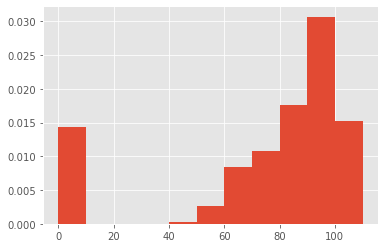

In [22]:
#Estonian Dataset
grades['Hinne (Punktid)'].hist(bins=[i*10 for i in range(12)],density=True)

Well that works!


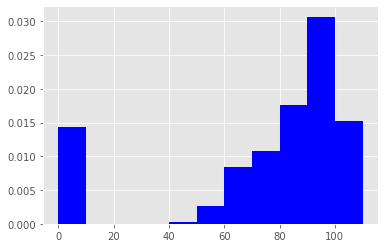

In [23]:
# English Data
grades_en['Grade (points) '].hist(bins=[i*10 for i in range(12)],color= 'blue', density=True)
print("Well that works!")

In [24]:
###Checking for students with zero
grades_en[grades_en['Grade (points) '] == 0].shape

(48, 108)

## The grading scale was A [90-100], B [80-90), C [70-80), D [60-70), E [50-60), F [0-50). 


In [25]:
##Making a copy of gradebook to further explore it
grades_en_cpy = grades_en.copy()

In [27]:
###Assigning grading scale to students (using the Grade points column or 'Hinne (Punktid)')
rows = len(grades_en)
test = np.ones(342)

grades_en_cpy.insert(len(grades_en_cpy.columns), "Grade (letter)", (test))

for row in range(0, rows):
    grade = int(grades_en_cpy['Grade (points) '].loc[row])

    if grade < 50:
        grades_en_cpy['Grade (letter)'].loc[row] = 'F'
    
    elif (grade >= 50) and (grade <= 59):
        grades_en_cpy['Grade (letter)'].loc[row] = 'E'
    
    elif (grade >= 60) and (grade <= 69):
        grades_en_cpy['Grade (letter)'].loc[row] = 'D'
    
    elif (grade >= 70) and (grade <= 79):
        grades_en_cpy['Grade (letter)'].loc[row] = 'C'
    
    elif (grade >= 80) and (grade <= 89):
        grades_en_cpy['Grade (letter)'].loc[row] = 'B'
    
    elif (grade >= 90) and (grade <= 100):
        grades_en_cpy['Grade (letter)'].loc[row] = 'A'

ValueError: cannot insert Grade (letter), already exists

In [28]:
#grades_en_cpy
sorted_grades_en_cpy = grades_en_cpy.sort_values(by=['Grade (letter)'], ascending=False)
sorted_grades_en_cpy.head(51)

,ID number,Test: 1. Weekly test (points),Test: 2. Weekly test (points),Test: 3. Weekly test (points),Test: 4. Weekly test (points),Test: 5. Weekly test (points),Test: 6. Weekly test (points),Test: 7. Weekly test (points),Test: 8. Weekly test (points),Test: 9. Weekly test (points),...,Test: Control Work Exercises (Points),Test: Control work exercises (points) .1,Test: Estimated parts of the sample exam (points),Test: Sample examination section 1 task (points),Task: Presentation of sample exam logs and video (points),Practicing together (points),Total result (points),Grade (points),Last downloaded from this course,Grade (letter)
110,50108070325,0.47,0.5,0.5,-,-,-,-,-,-,...,-,-,-,-,NaN,-,95.00,0.00,1612512350,F
322,50012172732,0.47,0.5,-,-,-,-,-,-,-,...,-,-,-,-,NaN,-,95.00,0.00,1612512354,F
207,46410212717,0.48,0.45,0.49,0.38,0.44,0.38,0.45,0.44,0.43,...,-,7.25,-,-,NaN,-,45.25,45.25,1612512352,F
205,50104262730,-,-,-,-,-,-,-,-,-,...,-,-,-,-,NaN,-,1.00,0.00,1612512352,F
204,39505102736,-,-,-,-,0.05,-,-,-,-,...,-,-,-,-,NaN,-,5.35,0.00,1612512352,F
31,50009230834,0.5,0.43,0,0.4,0.3,-,-,-,-,...,-,-,-,-,NaN,-,5.13,0.00,1612512349,F
279,50108202740,0.5,0.39,0.28,0.3,0.29,0.35,-,-,-,...,4.21,-,-,-,NaN,-,26.84,0.00,1612512354,F
324,60008132717,0.46,0.49,0.36,0.26,0.33,0.28,-,-,0,...,7,7.25,-,-,NaN,-,27.04,0.00,1612512354,F
198,50003045719,-,0.36,0.36,0.3,0.34,0.29,0.33,-,-,...,5,-,-,-,NaN,-,18.98,0.00,1612512352,F
36,50006212789,0.43,0.3,0.18,-,0.33,0.43,0.34,0.1,-,...,7,9,-,-,NaN,-,37.36,0.00,1612512349,F


**Total results (points) vs Grade (points) column has some inconsistency.**

Not everyone who score results points was assigned a grade point. We think this is because:
1. some students started the course and then drop out
2. some did successfully at the pre-exam in the 2nd week and saw that they did not need to continue the course given that they felt secure in their programming skills
3. other reasons unknown to us

In [29]:
%matplotlib widget
%matplotlib inline

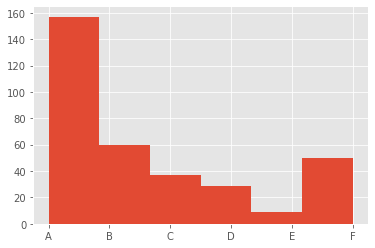

In [30]:
grades_en_cpy['Grade (letter)'].sort_values().hist(bins=6, density=False)

In [31]:
grades_en_cpy['Grade (letter)']

0      A
1      A
2      A
3      C
4      F
      ..
337    A
338    A
339    B
340    B
341    C
Name: Grade (letter), Length: 342, dtype: object

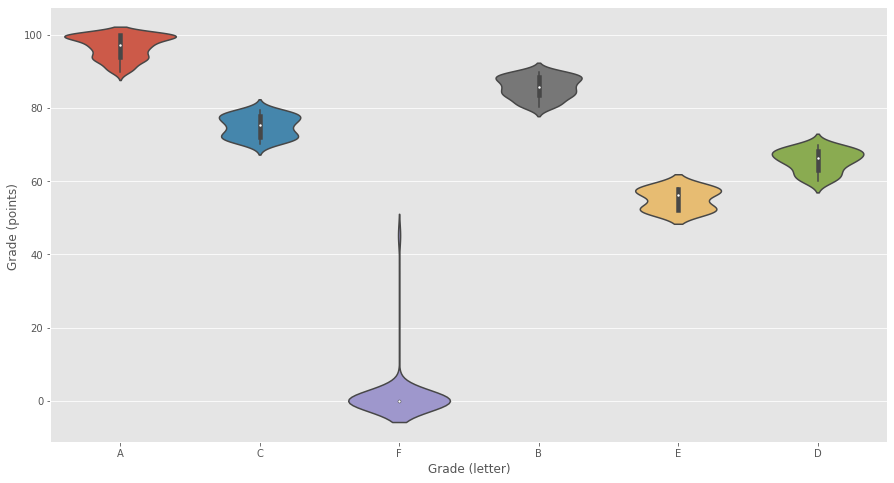

In [32]:
import pandas as pd
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.violinplot(x="Grade (letter)", y="Grade (points) ", data=grades_en_cpy)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
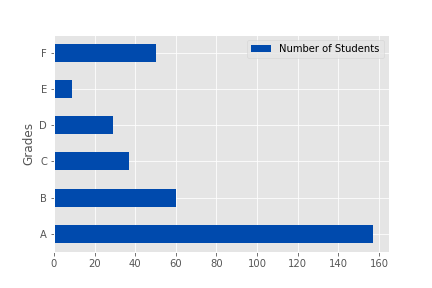

In [34]:
%matplotlib widget


df = pd.DataFrame({'Grades': ['A', 'B', 'C', 'D', 'E', 'F'], 'Number of Students': [157, 60, 37, 29, 9, 50]})
ax = df.plot.barh(x='Grades', y='Number of Students', color= '#004aad')

#plt.savefig("employee_growth_tp.png", transparent=True, showgrid=False)

In [35]:
count_A = grades_en_cpy['Grade (letter)'].value_counts()['A']
count_B = grades_en_cpy['Grade (letter)'].value_counts()['B']
count_C = grades_en_cpy['Grade (letter)'].value_counts()['C']
count_D = grades_en_cpy['Grade (letter)'].value_counts()['D']
count_E = grades_en_cpy['Grade (letter)'].value_counts()['E']
count_F = grades_en_cpy['Grade (letter)'].value_counts()['F']

count_total = count_A, count_B, count_C, count_D, count_E, count_F
count_total

(157, 60, 37, 29, 9, 50)

### Next steps ...
Randomly choose a student from each grade scale and check their moodle activity logs to see if any common activities patterns emerge.